In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('flow_cytometry_summary.csv')


In [8]:
print(df.isnull().sum())
df.dropna(inplace=True)
df['PBA Ratio'] = df['PBA Ratio'].astype(str)
df.rename(columns={'After Mean': 'gfp1 expression', 'Comp-Pacific Blue-A subset': 'cell viability'}, inplace=True)




Specimen                      0
PEI Ratio                     0
NP Ratio                      0
PBA Ratio                     0
Comp-Pacific Blue-A subset    0
q1                            0
q2                            0
q3                            0
q4                            0
Mean                          0
After Mean                    0
dtype: int64


/var/folders/cx/6xtl5nn162v9ll2lgzw139xh0000gn/T/ipykernel_53910/1592172962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PBA Ratio', y='gfp1 expression', data=df, ax=axes[0], palette='Blues_d')
/var/folders/cx/6xtl5nn162v9ll2lgzw139xh0000gn/T/ipykernel_53910/1592172962.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PBA Ratio', y='cell viability', data=df, ax=axes[1], palette='Greens_d')


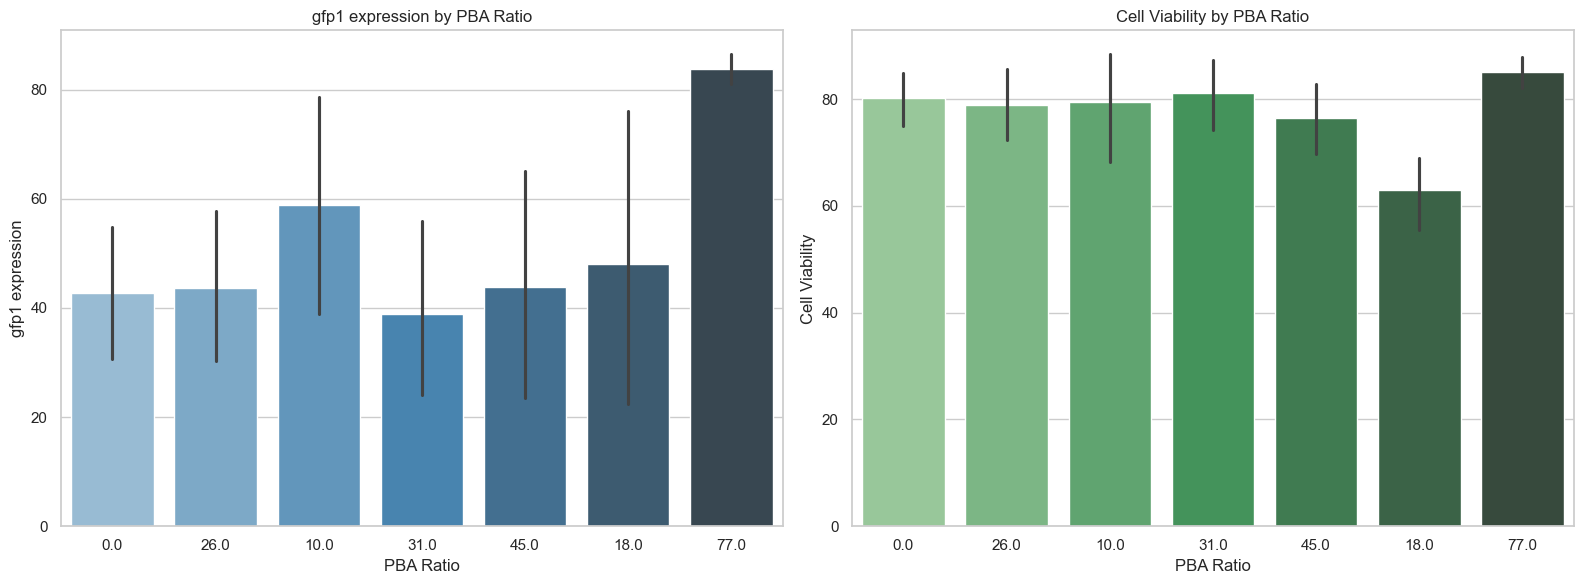

In [9]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
sns.barplot(x='PBA Ratio', y='gfp1 expression', data=df, ax=axes[0], palette='Blues_d')
axes[0].set_title('gfp1 expression by PBA Ratio')
axes[0].set_xlabel('PBA Ratio')
axes[0].set_ylabel('gfp1 expression')
sns.barplot(x='PBA Ratio', y='cell viability', data=df, ax=axes[1], palette='Greens_d')
axes[1].set_title('Cell Viability by PBA Ratio')
axes[1].set_xlabel('PBA Ratio')
axes[1].set_ylabel('Cell Viability')
plt.tight_layout()
plt.show()


In [10]:
agg_data = df.groupby('PBA Ratio').agg({
    'gfp1 expression': 'mean',
    'cell viability': 'mean'
}).reset_index()


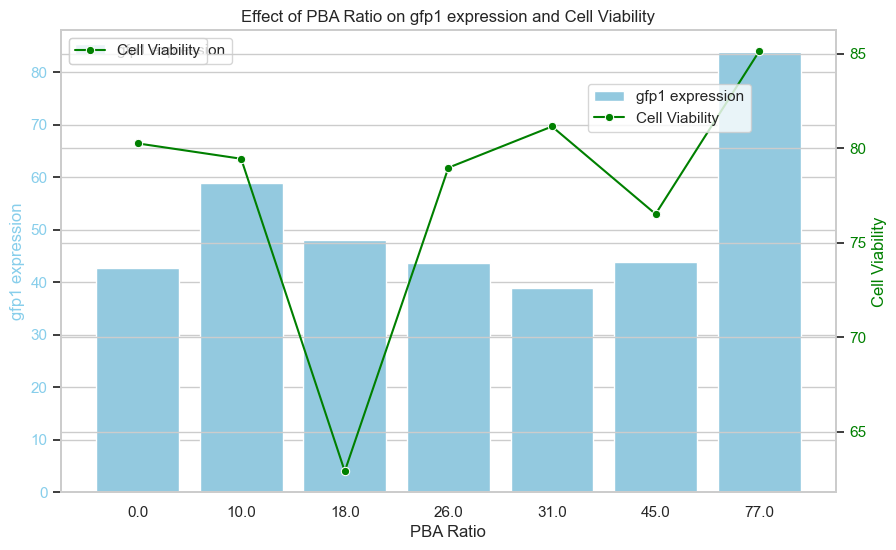

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='PBA Ratio', y='gfp1 expression', data=agg_data, color='skyblue', ax=ax1, label='gfp1 expression')
ax1.set_xlabel('PBA Ratio')
ax1.set_ylabel('gfp1 expression', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax2 = ax1.twinx()
sns.lineplot(x='PBA Ratio', y='cell viability', data=agg_data, color='green', marker='o', ax=ax2, label='Cell Viability')
ax2.set_ylabel('Cell Viability', color='green')
ax2.tick_params(axis='y', labelcolor='green')
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9), bbox_transform=ax1.transAxes)
plt.title('Effect of PBA Ratio on gfp1 expression and Cell Viability')
plt.show()
